In [1]:
import numpy as np 
import pandas as pd
df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheetname='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)

print ('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


We will do all basic and advance data visualizations using python's matPlotLib

We will drop some unnecessary columns first and will keep only required columns

In [24]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


we will have to rename the columns as default names are not making much sense

We will also add a column having sum of total immigrant came to canada throughout the time

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can["total"] =df_can.sum(axis=1)


In [5]:
df_can.columns = list(map(str, df_can.columns))

In [6]:
#creating a list of all the column names which have immigrant data
Years = list(map(str, range(1980,2014)))

In [7]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [33]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['seaborn-paper', 'seaborn-poster', 'seaborn-muted', 'seaborn-dark', 'seaborn-talk', 'bmh', 'grayscale', 'seaborn-darkgrid', 'ggplot', 'seaborn-dark-palette', 'classic', 'seaborn-bright', 'seaborn-ticks', 'seaborn-notebook', 'seaborn-pastel', 'fivethirtyeight', 'seaborn-colorblind', 'dark_background', 'seaborn-whitegrid', 'seaborn-deep', 'seaborn-white']


In [9]:
#Set the index for an easy search
df_can.set_index("Country",inplace=True)

In [10]:
df_can.index.name =None
df_can.head(1)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639


In [11]:
# Let's see how is the trend for people coming to canada from Haiti
df = df_can.loc["Haiti",Years]

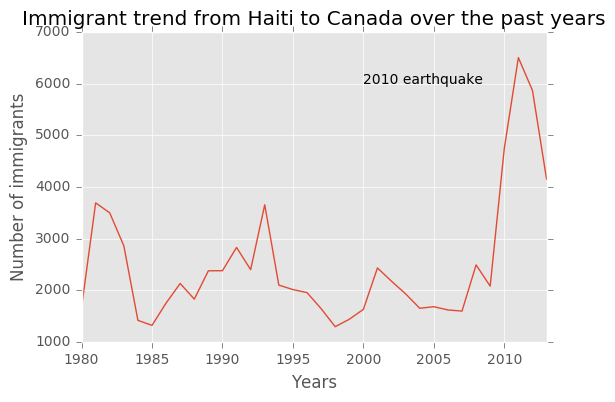

In [13]:
df.plot(kind="Line")

plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.title("Immigrant trend from Haiti to Canada over the past years")
plt.text(20,6000,"2010 earthquake")
plt.show()

In [14]:
#We saw a peak in number of immigrants after year 2010. After a quick google search, we found that there was a massive earth quake in 2010
# After which canada relaxed it's immigration policy for affected countries

In [16]:
# let's try making the same for more than one country.
df_CI = df_can.loc[["India","China"],Years]

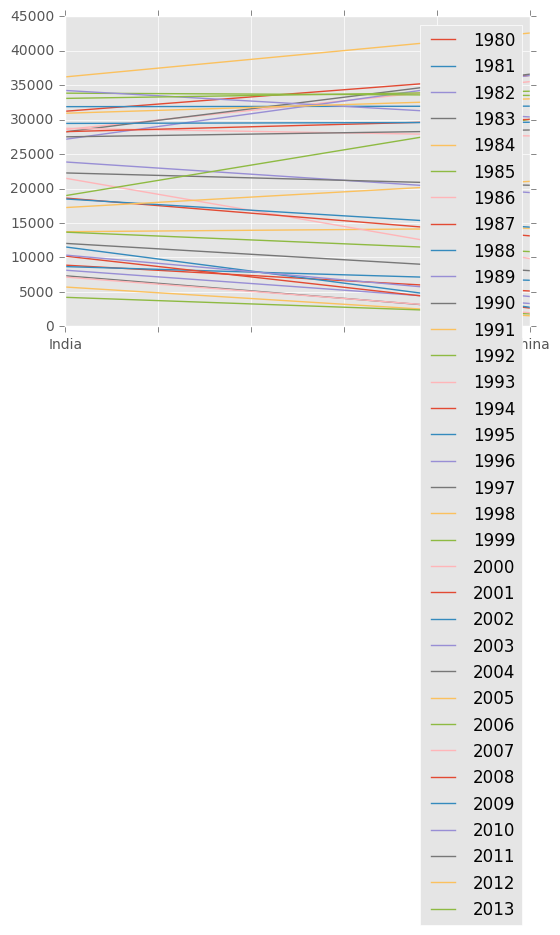

In [17]:
df_CI.plot(kind="Line")

In [18]:
# Not a good plot . right ? That is because we need to make some changes when we plot a dataframe.earlier we plotted a series.
#take transpose of dataframe as matplotlib places index on X axis and column values on Y axis

In [19]:
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


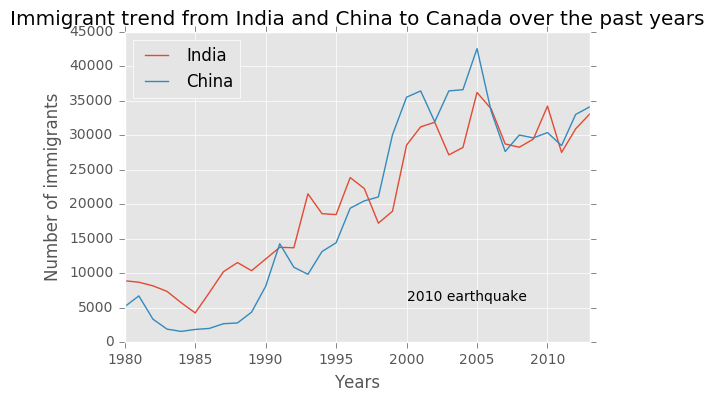

In [21]:
df_CI.plot(kind="Line")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.title("Immigrant trend from India and China to Canada over the past years")
plt.text(20,6000,"2010 earthquake")
plt.show()

This is interesting. Till year 2007 ,India was ahead of china in terms of number of immigrants but after 2007 China took lead.
we see that though there is an increasing trend in the data but numbers fall down for both india and China after 2003.
Could it be the recession period where people were loosing jobs abroad and thus less people were willing to go.
2010 year earthquake didn't increase numbers here.Numbers are coming down for India and china after 2010.
Could it be the reason that canadian govt was not accepting applications from countries which were not affected by the EQ

In [30]:
#Compare the trend of top 3 countries
df_top = df_can.sort_values("total",ascending=False).head(3)
df_top = df_top[Years]
df_top = df_top.transpose()

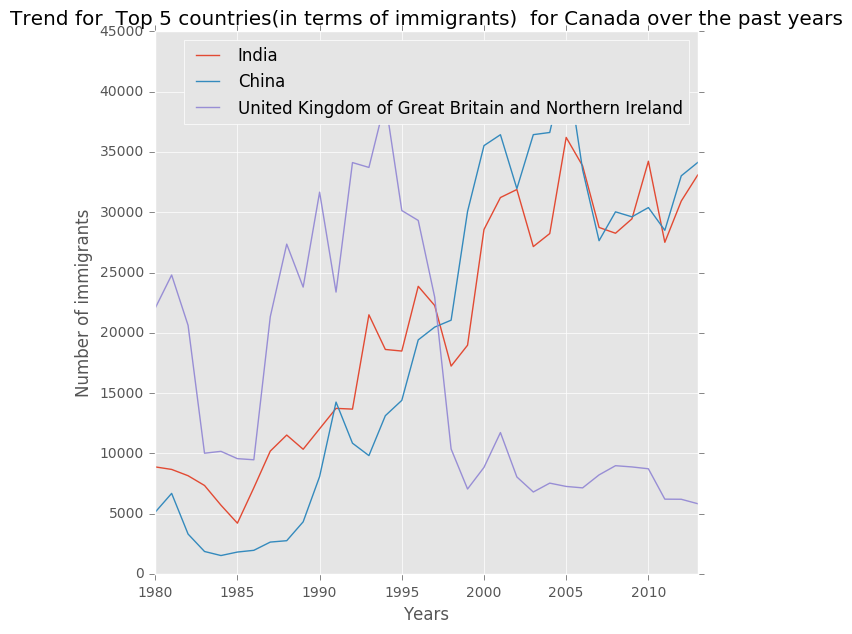

In [61]:
df_top.plot(kind="Line",figsize=(7,7))
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.title("Trend for  Top 5 countries(in terms of immigrants)  for Canada over the past years")
# plt.text(20,6000,"2010 earthquake")
plt.legend()
plt.show()

In [54]:
# the numbers are shrinking down for UK. After 1995 we see a sharp fall in number of immigrants. the assumption of 2003 recession 
# holds true for UK as well. We may have to investigate for the correct reason.

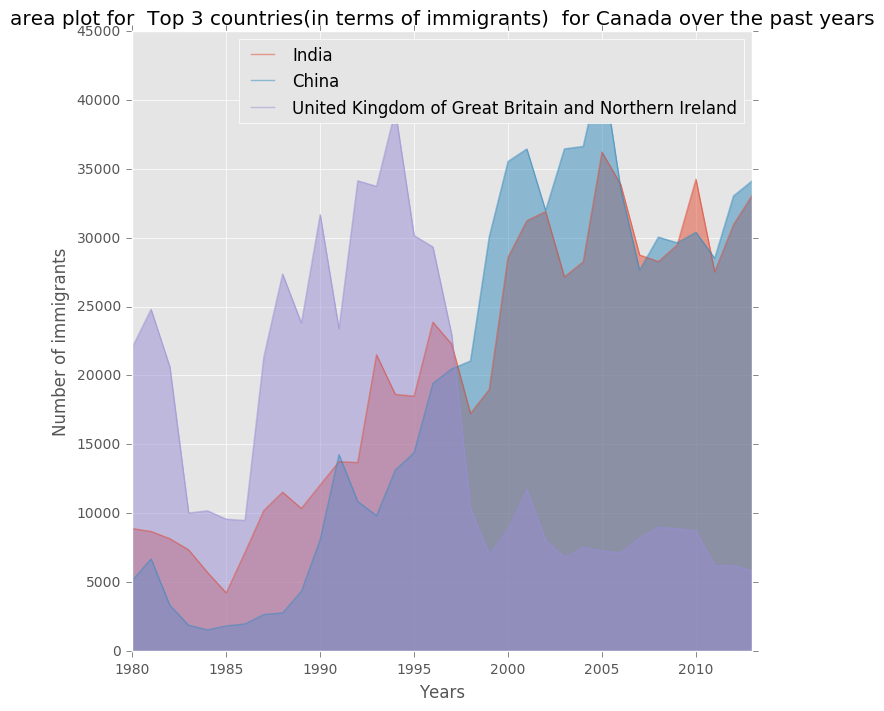

In [63]:
#Now we will look for the area plot

df_top.plot(kind="Area",stacked= False,figsize=(8,8))
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.title("area plot for  Top 3 countries(in terms of immigrants)  for Canada over the past years")
# plt.text(20,6000,"2010 earthquake")
plt.legend()
plt.show()

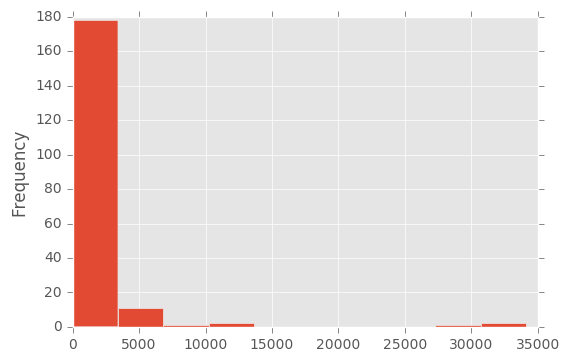

In [41]:
#seing distribution of individual columns. 
# We can use histogram for that
#let's see the  trend for people coming to canada using column "2013"
df_can["2013"].plot(kind="hist")


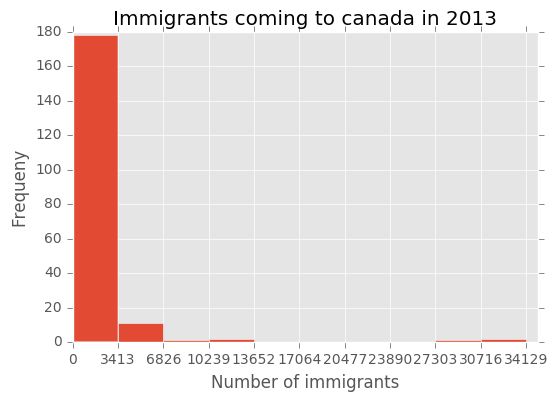

In [44]:
# but the numbers are not alligned with bars
import numpy as np
count, binRange = np.histogram(df_can["2013"])
df_can["2013"].plot(kind="hist",xticks= binRange)
plt.ylabel("Frequeny")
plt.xlabel("Number of immigrants")
plt.title("Immigrants coming to canada in 2013")
plt.show()

What can we infer from the above graph? 

1- At most 3413 immigrants came to Canada from around 180 countries. For around 10 countries, numbers were between 3413 and 6286.

2- There are a few countries for which numbers are as high as 34129

For first point, Can we assume these are the people who come looking for work or study as it seems a reasonable quantity
For Second point, Can these we refugees/Political asylum? As these numbers are abnormally high and occurrences are very few.


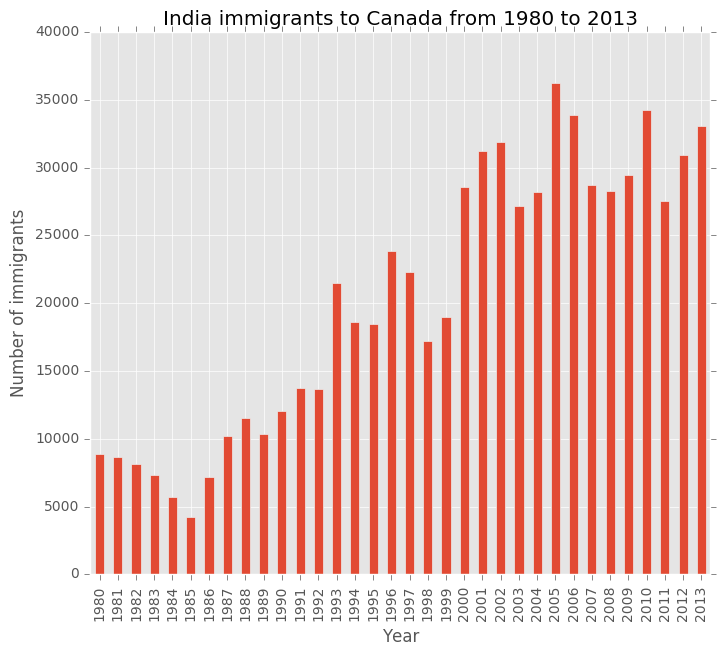

In [65]:
# We can use the Bar charts as well . It will give us a good grip of what has happened in which year
df_India = df_can.loc["India",Years]
df_India.plot(kind="bar",figsize=(8,7))
plt.xlabel('Year') 
plt.ylabel('Number of immigrants')
plt.title('India immigrants to Canada from 1980 to 2013')

plt.show()

This plot is at par with our earlier observations with line plot. Let's put an arrow showing the continuous  increase in numers from 1989
to 1993

We will use annotate method of matplotlib's scripting layer


we will supply below params

1- s - text


2- xy -end points


3- xytext - statring point


4- arrowprops- arrow style



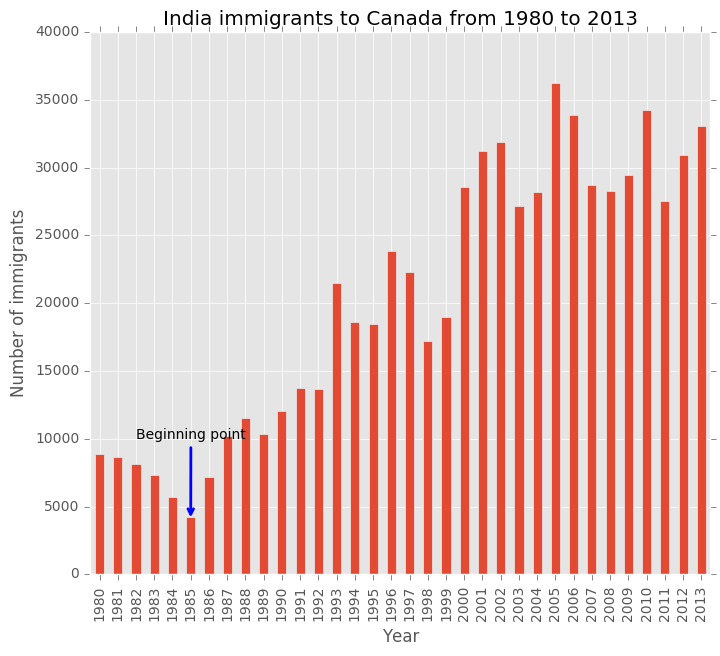

In [82]:
df_India = df_can.loc["India",Years]
df_India.plot(kind="bar",figsize=(8,7),rot=90 )
plt.xlabel('Year') 
plt.ylabel('Number of immigrants')
plt.title('India immigrants to Canada from 1980 to 2013')
plt.annotate("Beginning point",xy=(5,4000),xytext=(2,10000),xycoords='data',arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
# plt.annotate("2010 finantial crisis",xy = (28,30),rotation=72.,va="bottom",ha="left")

plt.show()

In [79]:
#We are annotating the point in time where the upward trend picked speed and never came down  significantly.
# People stopped loving their native country ?
# Shall We search whci country is least loved :)

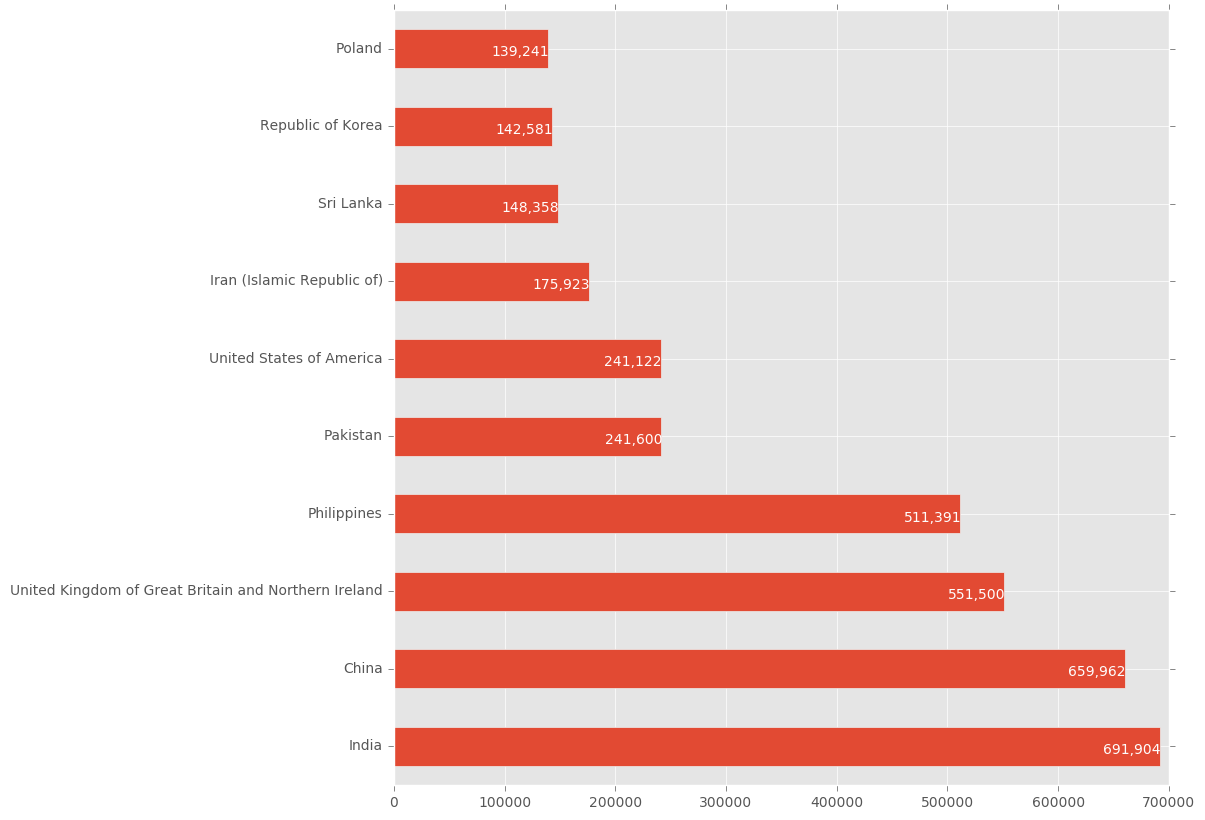

In [88]:
df_lst = df_can.sort_values("total",ascending=False)
df_lst = df_lst.head(10)
df_lst = df_lst["total"]
df_lst.plot(kind="barh",figsize=(10,10))
for index, value in enumerate(df_lst): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 51000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 51000, index - 0.10), color='white')
    
plt.show()

In [ ]:
#Comeone !!!! India is on Top. This is bad. Real bad.